# Recitation 11, Last One :(

The goal is to help you out with Project 3, we will go over the following:

- Ordinary Differential Equations (ODEs)
- Solution of Underdetermined System of Equations

## ODEs

Equations with a derivative in them are called **differential equations**. In robotics, we use these equations to specify the dynamics (Behaviour) of systems of interests (robots, segways, carts, etc.). Let's try to derive these equations for the simple cart example in Project 3. 

Lets take the Cart Example. Can we derive the dynamics of a cart in the ofrm of a differential equation? 









In [101]:
### Write down function to get the Cart Model! 
function cartModel()
    
end
(A,B)=cartModel()
(nr,nc) = size(A)


(2, 2)

Using this formulation, let us try to build a simple simulator for our Cart moving in an ideal world, with no disturbances!




In [102]:
function simModelNomOpenLoop(A,B,x0,u)
    
end

simModelNomOpenLoop (generic function with 1 method)

Uisng Newton's Equations of motion, can you figure out a control sequence that can drive the cart to 15m and then rest there in 20 seconds? (Think about the classic ball thrown in the air problem!)

In [103]:
N = 200;
dt = 0.1
t=(1:N)*dt
uManual = [0.15*ones(100,1); -0.15*ones(100,1)];
x0 = [0;0];

In [104]:
using Plots
xTrajNom=simModelNomOpenLoop(A,B,x0,uManual)
plot()
anim = @animate for i = 1:size(xTrajNom,2)
    scatter([xTrajNom[1,i]], [4.0], ylim = (0,8), xlim = (0,17), markershape = :rect, markersize = 20, color=:orange,label = "Open-loop, no disturbances", aspect_ratio = :equal )
#     scatter!([xTrajDist[1,i]], [1.0], markershape = :rect, markersize = 20, color=:blue, label = "Open-Loop, with disturbances" ,aspect_ratio = :equal)
    scatter!([xTrajNom[1,i]+0.4 xTrajNom[1,i]-0.4], [3.2 3.2], markershape = :circle, markersize = 7, color = :yellow, label = "")
    plot!([0;25],[3.0;3.0], color = :black, label = "", title = "Carts in different worlds at 2x")
end
gif(anim, "simple_cart_dist.mp4", fps = 20)

┌ Info: Saved animation to 
│   fn = C:\Users\Tribhi Kathuria\Documents\ROB-101\Recitations\Recitation 11\simple_cart_dist.mp4
└ @ Plots C:\Users\Tribhi Kathuria\.julia\packages\Plots\3INZP\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\Tribhi Kathuria\\Documents\\ROB-101\\Recitations\\Recitation 11\\simple_cart_dist.mp4")

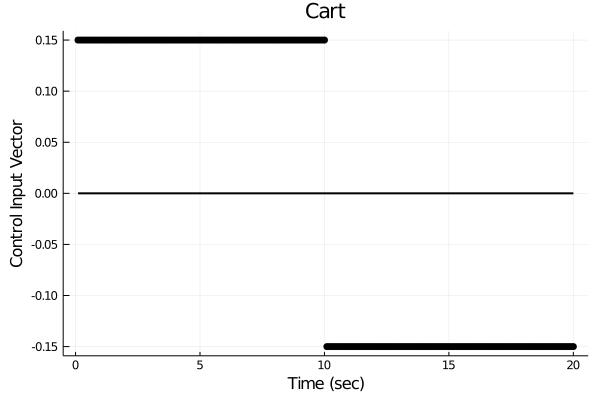

In [105]:
titre="Cart"
p1=scatter(t,uManual,legend=false, title=titre, color=:black )
xlabel!("Time (sec)");ylabel!("Control Input Vector")
plot!(t,0.0*uManual,linewidth=2, color=:black)
display(p1)

**Remark**: What is wrong with a control like this one?

How do we solve for this fixed horizon problem using methods learned in Linear Algebra. How do we optimize the performance for our control? 

We can forward simulate our state to N time intervals and then put in the required constraint of being able to achieve the goal state of having position be 15m and velocity be 0m/s. Let's see how we can do that! 

In [106]:
function minNormUnderdetermined(A,b)
    return A'*inv(A*A')*b
end

minNormUnderdetermined (generic function with 1 method)

In [107]:

plot()
anim = @animate for i = 1:size(xTrajNom,2)
    scatter([xTrajNom[1,i]], [4.0], ylim = (0,8), xlim = (0,17), markershape = :rect, markersize = 20, color=:orange,label = "Open-loop, no disturbances", aspect_ratio = :equal )
#     scatter!([xTrajDist[1,i]], [1.0], markershape = :rect, markersize = 20, color=:blue, label = "Open-Loop, with disturbances" ,aspect_ratio = :equal)
    scatter!([xTrajNom[1,i]+0.4 xTrajNom[1,i]-0.4], [3.2 3.2], markershape = :circle, markersize = 7, color = :yellow, label = "")
    plot!([0;25],[3.0;3.0], color = :black, label = "", title = "Carts in different worlds at 2x")
end
gif(anim, "simple_cart_dist.mp4", fps = 20)

┌ Info: Saved animation to 
│   fn = C:\Users\Tribhi Kathuria\Documents\ROB-101\Recitations\Recitation 11\simple_cart_dist.mp4
└ @ Plots C:\Users\Tribhi Kathuria\.julia\packages\Plots\3INZP\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\Tribhi Kathuria\\Documents\\ROB-101\\Recitations\\Recitation 11\\simple_cart_dist.mp4")

## Reference tracking

In [108]:

plot()
anim = @animate for i = 1:size(xTrajNom,2)
    scatter([xTrajNom[1,i]], [4.0], ylim = (0,8), xlim = (0,17), markershape = :rect, markersize = 20, color=:orange,label = "Open-loop, no disturbances", aspect_ratio = :equal )
#     scatter!([xTrajDist[1,i]], [1.0], markershape = :rect, markersize = 20, color=:blue, label = "Open-Loop, with disturbances" ,aspect_ratio = :equal)
    scatter!([xTrajNom[1,i]+0.4 xTrajNom[1,i]-0.4], [3.2 3.2], markershape = :circle, markersize = 7, color = :yellow, label = "")
    plot!([0;25],[3.0;3.0], color = :black, label = "", title = "Carts in different worlds at 2x")
end
gif(anim, "simple_cart_dist.mp4", fps = 20)

┌ Info: Saved animation to 
│   fn = C:\Users\Tribhi Kathuria\Documents\ROB-101\Recitations\Recitation 11\simple_cart_dist.mp4
└ @ Plots C:\Users\Tribhi Kathuria\.julia\packages\Plots\3INZP\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\Tribhi Kathuria\\Documents\\ROB-101\\Recitations\\Recitation 11\\simple_cart_dist.mp4")

In [119]:
### Write down function to get the Cart Model! 
function cartModel_damped()
    # kp1 means k + 1
    # xkp1 = A xk + B uk
    dt = 0.1 #assumed value
    damping = 0.005;
    A = [1.0 dt; 0.0 1.0-damping];
    B = [0.0; dt]
    (nr,nc) = size(A)
    return A, B
end
(A_real,B_real)=cartModel_damped()
(nr,nc) = size(A_real)


(2, 2)

In [120]:
xTrajDist=simModelNomOpenLoop(A_real,B_real,x0,uControl)

plot()
anim = @animate for i = 1:size(xTrajNom,2)
    scatter([xTrajNom[1,i]], [4.0], ylim = (0,8), xlim = (0,17), markershape = :rect, markersize = 20, color=:orange,label = "Open-loop, no disturbances", aspect_ratio = :equal )
    scatter!([xTrajDist[1,i]], [1.0], markershape = :rect, markersize = 20, color=:blue, label = "Open-Loop, with disturbances" ,aspect_ratio = :equal)
    scatter!([xTrajNom[1,i]+0.4 xTrajNom[1,i]-0.4], [3.2 3.2], markershape = :circle, markersize = 7, color = :yellow, label = "")
    plot!([0;25],[3.0;3.0], color = :black, label = "", title = "Carts in different worlds at 2x")
end
gif(anim, "simple_cart_dist.mp4", fps = 20)

┌ Info: Saved animation to 
│   fn = C:\Users\Tribhi Kathuria\Documents\ROB-101\Recitations\Recitation 11\simple_cart_dist.mp4
└ @ Plots C:\Users\Tribhi Kathuria\.julia\packages\Plots\3INZP\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\Tribhi Kathuria\\Documents\\ROB-101\\Recitations\\Recitation 11\\simple_cart_dist.mp4")

In [121]:
# Read the followign code and explain what each function is doing. This may be easier
# after you can execute the code two cells from now
#
function myCartMPC(A,B,xk,k,N,xGoal)
    # xk is the current position and velocity of the cart
    # k is the time index. Hence, tk = k dt
    # N is the total amount of time we were given to reach xGoal
    # Hence, N-k is the time left
    (nr,nc) = size(A)
    nControlHoriz=max(N-k,3)  # Receeding Horizon, MPC
    S=A^nControlHoriz
    M=Array{Float64,2}(undef,nr,0)
    for i=1:nControlHoriz
        M=[A*M B]
    end
    uControl=minNormUnderdetermined(M,xGoal-S*xk)
    uk=uControl[1]
    return uk
end

#
function simCartMPC(x0,dt,N,xGoal)
    (A,B) = cartModel()
    (rA,cA) = size(A)
    N=1+N # because x0 is included
    xTraj = Array{Float64,2}(undef,rA,0)
    uTraj = Array{Float64,2}(undef,1,0)
    xTraj=[xTraj x0]
    (A_real,B_real)=cartModel_damped()
    for k = 1:N
        xk=xTraj[:,k]
        uk=myCartMPC(A,B,xk,k,N,xGoal)
        uTraj=[uTraj uk]   
        xkp1 = A_real*xk+B_real*uk
        xTraj = [xTraj xkp1]          
    end
    return xTraj, uTraj
end


simCartMPC (generic function with 1 method)

In [123]:
# Run me dont change me, I will make a video for the cart simulation 
(xTrajMPC, uTrajMPC) = simCartMPC(x0,dt,N,xGoal)
plot()
anim = @animate for i = 1:size(xTrajNom,2)
    scatter([xTrajNom[1,i]], [4.0], ylim = (0,11), xlim = (0,17), markershape = :rect, markersize = 20, color=:orange,label = "Open-loop, no disturbances", aspect_ratio = :equal )
    scatter!([xTrajDist[1,i]], [1.0], markershape = :rect, markersize = 20, color=:blue, label = "Open-Loop, with disturbances" ,aspect_ratio = :equal)
    scatter!([xTrajMPC[1,i]], [7.0], markershape = :rect, markersize = 20, color=:red, label = "Closed-loop Control:; MPC battling the disturbances" ,aspect_ratio = :equal)
    scatter!([xTrajNom[1,i]+0.4 xTrajNom[1,i]-0.4 xTrajDist[1,i]+0.4 xTrajDist[1,i]-0.4], [3.2 3.2 0.2 .2], markershape = :circle, markersize = 7, color = :yellow, label = "")
    scatter!([xTrajMPC[1,i]+0.4 xTrajMPC[1,i]-0.4], [6.2 6.2], markershape = :circle, markersize = 7, color = :yellow, label = "")
    plot!([0 0;25 25],[3.0 6.0;3.0 6.0], color = :black, label = "", title = "Carts in different worlds at 2x")
end
gif(anim, "simple_cart_MPC.mp4", fps = 20)

┌ Info: Saved animation to 
│   fn = C:\Users\Tribhi Kathuria\Documents\ROB-101\Recitations\Recitation 11\simple_cart_MPC.mp4
└ @ Plots C:\Users\Tribhi Kathuria\.julia\packages\Plots\3INZP\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\Tribhi Kathuria\\Documents\\ROB-101\\Recitations\\Recitation 11\\simple_cart_MPC.mp4")

## Pendulum Example

a pendulum of mass $m$ and length $\ell$ swinging from a frictionless pivot satisfies the equation:

$\begin{equation}
\begin{aligned}
    \frac{d x_1(t)}{dt}&= x_2(t) \\
    \frac{d x_2(t)}{dt}&= -\frac{g}{\ell} \sin(x_1(t)),
\end{aligned}
\end{equation}$


where $x_1$ is the angle of the pendulum and $x_2$ is its angular velocity. 
We'll rewrite the model in vector form by defining

$\begin{equation}
    x := \left[\begin{array}{c}
        x_1 \\
         x_2
    \end{array} \right],
\end{equation}$

so that

$\begin{equation}
    \frac{dx(t)}{dt} = \left[\begin{array}{c}
        \frac{dx_1(t)}{dt}  \\
         \frac{dx_2(t)}{dt} 
    \end{array} \right]:=  \underbrace{\left[\begin{array}{c}
        x_2(t) \\
          -\frac{g}{\ell} \sin(x_1(t))
    \end{array} \right]}_{f(x(t))} =: f(x(t))
\end{equation}$

## Euler Integration

Now that we have a model that can express the behavior of a Cart at any dicrete time k, how can we use it to predict the state variables, $x_k$ at different time instants? 

A simple way of doing that is using Euler Integration! 

To find a solution, we discretize the model with $\delta t>0$

$\begin{equation}
\begin{aligned}
    \frac{dx(t)}{dt} &\approx \frac{x(t+\delta t) - x(t- \delta t)}{ 2\delta t} \text{   and    }\frac{dx(t)}{dt} = f(x(t))\\
    &\Updownarrow \\
   x(t+\delta t) &= x(t-\delta t) + 2 \delta t f(x(t)) \text{   and    } t=k\cdot \delta t\\
   &\Updownarrow \\
   x[k+1] & = x[k-1] + \delta t f(x[k])
\end{aligned}
\end{equation}$

This is usefull for non-linear models, for our problem the intergration step is linearized and can be derived as above! 

In [124]:
function Pendulum(x0,N)
    dt=.01
    K=1:N
    time = K*dt
    g=9.81 #m/s^2
    l=4 # m
    x=zeros(N,2)
    #Pendulum equations
    f(x1,x2)=[x2;-(g/l)*sin(x1)]
    #Initial conditions
    x[1, :]= x0;
    x[2, :]=x[1,:] + dt*f(x[1,1],x[1,2])
    #Euler integration based on Symmetric Difference for dx/dt
    for k=2:(N-1)
    x[k+1,:]=x[k-1,:] +2*dt*f(x[k,1],x[k,2])
    end
    return x
end

Pendulum (generic function with 1 method)

What if we wanted to perturb our Pendulum by applying a force at the free end of the pendulum? How much force would we need to set it into going into a circle? 

The model for the perturbed state is given as below, u is the force being applied to the pendulum, If you taking a physics course the derivation for this model given in [article](https://jmichaux.github.io/_notebook/pendulum/) will make sense to you! 

In [125]:
function Forced_Pendulum(x0,N,u)
    dt=.01
    K=1:N
    time = K*dt
    g=9.81 #m/s^2
    l=4 # m
    m = 0.1
    x=zeros(N,2)
    #Pendulum equations
    f(x1,x2,u1)=[x2;(u1-(m*g*l)*sin(x1))/(m*(l^2)/2)]
    #Initial conditions
    x[1, :]= x0;
    x[2, :]=x[1,:] + dt*f(x[1,1],x[1,2],u[1])
    #Euler integration based on Symmetric Difference for dx/dt
    for k=2:(N-1)
    x[k+1,:]=x[k-1,:] +2*dt*f(x[k,1],x[k,2],u[k])
    end
    return x
end

Forced_Pendulum (generic function with 1 method)

In [144]:
function wraptopi(angle_rad)
    for i = 1:length(angle_rad)
        while((angle_rad[i]>pi)||(angle_rad[i]<-pi))
          angle_rad[i] = angle_rad[i] - 2*pi*floor((angle_rad[i]+pi)/(2*pi)); 
        end
    end
    return angle_rad
end

wraptopi (generic function with 1 method)

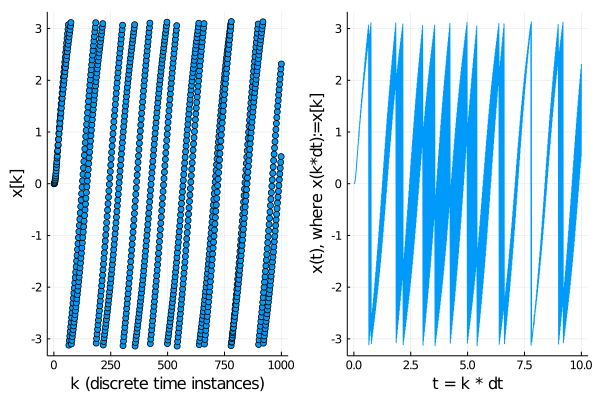

In [143]:
x0 = [0 0]
N = 1000;
dt=.01
K=1:N
time = K*dt
uManual = [50*ones(10,1);zeros(5000,1)]
x = Forced_Pendulum(x0,N,uManual)
# x[:,1] = wraptopi(x[:,1])
plot1=scatter(K,wraptopi(x[:,1]),xlabel="k (discrete time instances)", ylabel="x[k]", leg=false)
plot2=plot(time,wraptopi(x[:,1]),xlabel="t = k * dt", ylabel="x(t), where x(k*dt):=x[k]", leg=false)
plot(plot1, plot2, layout = (1, 2), legend = false)
#Turn the plot into an image that one can copy
plot!(fmt = :png) 

┌ Info: Saved animation to 
│   fn = C:\Users\Tribhi Kathuria\Documents\ROB-101\Recitations\Recitation 11\pendulum.gif
└ @ Plots C:\Users\Tribhi Kathuria\.julia\packages\Plots\3INZP\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\Tribhi Kathuria\\Documents\\ROB-101\\Recitations\\Recitation 11\\pendulum.gif")
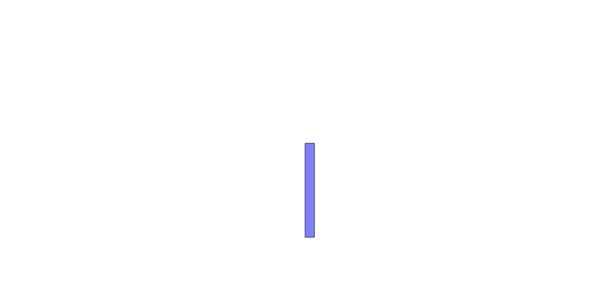

In [145]:
function rect_rot(w, h, theta)
    # w, h: x extend, y extend
    # t: translation
    # theta: rotation in negative z direction
    rot = [cos(theta) sin(theta); -sin(theta) cos(theta)]
    coord = rot*[-w/2 w/2 w/2 -w/2; 0 0 h h]
    Shape(coord[1, :], -coord[2, :])
end
plot(xlim = (-3, 3), ylim = (-2.8, 2.8),
             framestyle = :none, size = (600, 300), legend = false)
anim = @animate for i = 1:10:size(x,1)
    lineW = 0.1
    r = 2
    plot(rect_rot(lineW, r, x[i,1]), opacity=.5, c=:blue1, xlim = (-3, 3), ylim = (-2.8, 2.8),
             framestyle = :none, size = (600, 300), legend = false)
end
gif(anim, "pendulum.gif", fps = 20)